#1)Предварительная обработка данных:
   Нормализация: Масштабирование данных,нормализация пиксельных значений в диапазон [0, 1] 0-черный, 1- белый
#2)Архитектура сети:
  Первый скрытый слой из 128 неиронов. Второй слой из 64 неиронов.
#3)Функция активации:
  Relu
#4)Метод регуляризации:
  L2
#5)Метод оптимизации:
  RMSprop
#6)Параметр обучения:
  Эпохи: Количество проходов по всему датасету (20).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

1

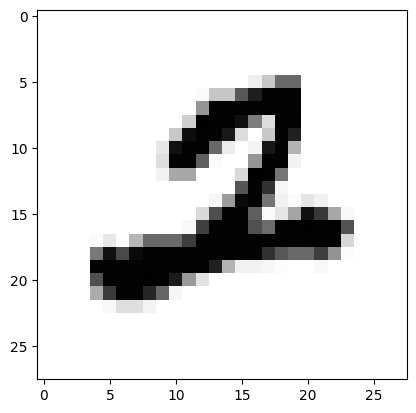

In [ ]:
#загрузка обучающей и тестовой выборки датасет
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#нормализация входных данных
x_train, x_test = x_train / 255.0, x_test / 255.0
#визуализация картинки с рук.цифрой из датасета
plt.imshow(x_train[33133].reshape((28, 28)), cmap='Greys')
y_train[33133]

In [ ]:
 model = tf.keras.models.Sequential ([
  #преобразование картинки в вектор из 784 єлементов
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  #каждый элемент входного слоя связываем с неироном
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=6)

In [ ]:
model.compile(optimizer=('RMSprop'),
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,epochs=20,validation_split=0.2,batch_size=32,callbacks=callback)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5121 - accuracy: 0.9027 - val_loss: 0.3103 - val_accuracy: 0.9485
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3099 - accuracy: 0.9433 - val_loss: 0.2389 - val_accuracy: 0.9621
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2642 - accuracy: 0.9523 - val_loss: 0.2214 - val_accuracy: 0.9623
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2450 - accuracy: 0.9532 - val_loss: 0.2034 - val_accuracy: 0.9662
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2328 - accuracy: 0.9553 - val_loss: 0.2168 - val_accuracy: 0.9614
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2240 - accuracy: 0.9570 - val_loss: 0.1917 - val_accuracy: 0.9679
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2200 - accuracy: 0.9574 - val_loss: 0.1941 - val_accuracy:

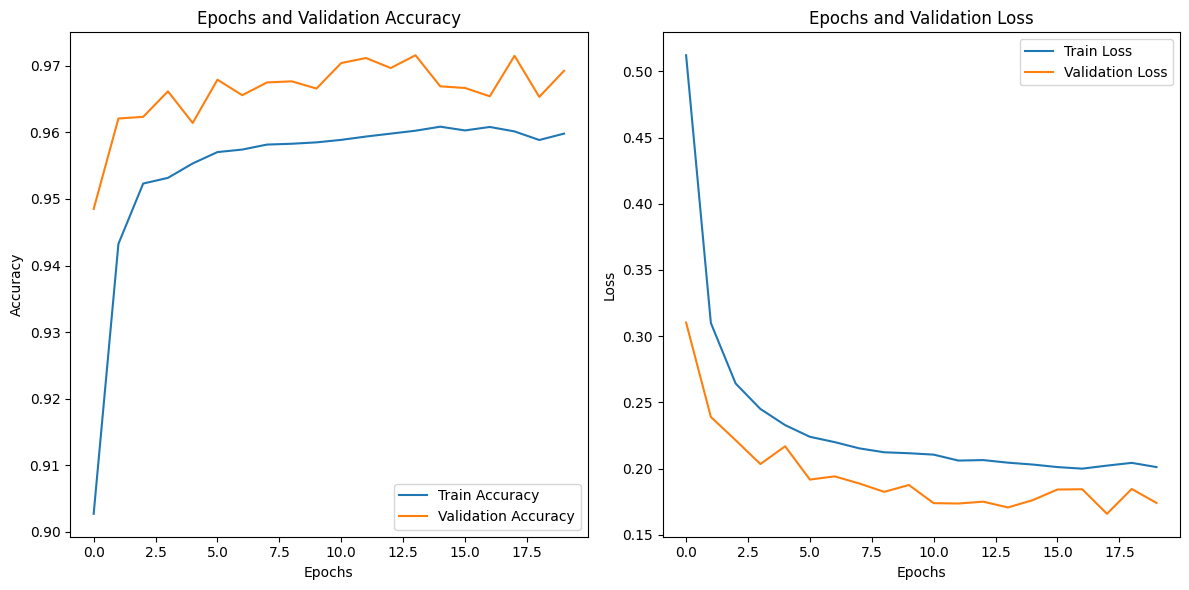

In [ ]:
# Построение графика Epochs and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs and Validation Accuracy')
plt.legend()

# Построение графика Epochs and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()